In [44]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def fresnel_propTF(u1,L,lam,z):
    """ Propagation Transfer Function using Fresnel's approximation

    Args:
        u1: source plane field
        L:  width of the plane
        lam: wavelength of the monochromatic source
        z:  propagation distance
    

    Returns: u2 the observation plane field
    """
    
    m,n = u1.shape            #input array size
    dx = L/m                 #sample interval
    k = 2*np.pi/lam          #wavenumber
    fx = np.arange(-1/(2*dx),1/(2*dx),1/L,'float64')   #frequency co-ordinates
    fy = fx
    
    [FX,FY] = np.meshgrid(fx,fy)
    H = np.exp(-1j*np.pi*lam*z*(FX**2 + FY**2))*np.exp(1j*k*z)
    H = np.fft.fftshift(H)
    U1 = np.fft.fft2(np.fft.fftshift(u1))

    U2 = H*U1       
    u2 = np.fft.ifftshift(np.fft.ifft2(U2))
    
    return u2


def fresnel_propTF1D(u,L,lam,z):
    """ Propagation Transfer Function using Fresnel's approximation

    Args:
        u1: source plane field
        L:  width of the plane
        lam: wavelength of the monochromatic source
        z:  propagation distance
    

    Returns: u2 the observation plane field
    """
    
    m = u.shape[0]            #input array size
    dx = L/m                 #sample interval
    k = 2*np.pi/lam          #wavenumber
    fx = np.arange(-1/(2*dx),1/(2*dx),1/L,'float64')   #frequency co-ordinates
        
    H = np.exp(-1j*np.pi*lam*z*(fx**2))*np.exp(1j*k*z)
    H = np.fft.fftshift(H)
    U = np.fft.fft(np.fft.fftshift(u))

    U2 = H*U       
    u2 = np.fft.ifftshift(np.fft.ifft(U2))
    
    return u2


def frensel_propIR(u,L,lam,z):
    """ Propagation Impulse Response Approach for 1D signal

    Args:
        u: source plane field
        L:  width of the plane
        lam: wavelength of the monochromatic source
        z:  propagation distance
    

    Returns: u2 the observation plane field
    """
    
    m = u.shape[0]            #input array size
    dx = L/m                 #sample interval
    k = 2*np.pi/lam          #wavenumber
    
    x = np.arange(-L/2,L/2,dx,'float64')
    h = 1/(1j*lam*z)*np.exp(1j*k/(2*z)*(x**2))*np.exp(1j*k*z)
    
    H = np.fft.fft(np.fft.fftshift(h))*(dx**2)
    U = np.fft.fft(np.fft.fftshift(u))
    
    Uprop = H*U       
    uprop = np.fft.ifftshift(np.fft.ifft(Uprop,8192))
    
    return uprop

def rect(x):
    """ Function to create a rectangular pulse of unit amplitude and area

    Args:
        x: Input signal 

    Returns: Rectangular pulse of same length as x
    """
    return (0.5*(np.sign(x+0.5) - np.sign(x-0.5)));


def get_square_aperture(L=0.5,M=250,lam=0.5e-6,w=0.0051,z=2000):
    """ Function that creates a square beam based on arguments provided
        Default parameters added
    Args:
        L: width of the Source Plane in m
        M: Number of Samples 
        lam: wavelength in m
        w: half width of the aperture in m
        z: propagation distance
        
    Usage:    
        get_square_beam(L,M,lam,w,z)
        
    Returns: u1 source plane field for scalar diffraction
    
    """
    dx1 = L/M
    x1 = np.arange(-L/2,L/2,dx1,'float64')
    y1 = x1    
    [X1,Y1] = np.meshgrid(x1,y1)  
    u1 = rect(X1/(2*w))*rect(Y1/(2*w))
    return u1

def get_grating_cos(L,M,lam,w,p):
    """ Function that creates a cosine diffraction grating 
        Default parameters added
    Args:
        L: width of the Source Plane
        M: Number of Samples 
        lam: wavelength
        w: half width of the aperture
        p: period of the cosine wave
        
    Usage:    
        get_grating_cos(L,M,lam,w,p)
    
    Returns: Cosine Grating transmittance field
    
    """
    dx1 = L/M
    x1 = np.arange(-L/2,L/2,dx1,'float64')
    y1 = x1    
    [X1,Y1] = np.meshgrid(x1,y1)
    u1 = 0.5*(1+np.cos((2*np.pi*X1)/p))*rect(X1/(2*w))*rect(Y1/(2*w))
    return u1

def get_grating_cos1D(L,M,lam,w,p):
    """ Function that creates a cosine diffraction grating 
        Default parameters added
    Args:
        L: width of the Source Plane
        M: Number of Samples 
        lam: wavelength
        w: half width of the aperture
        p: period of the cosine wave
        
    Usage:    
        get_grating_cos(L,M,lam,w,p)
    
    Returns: Cosine Grating transmittance field
    
    """
    dx = L/M
    x = np.arange(-L/2,L/2,dx,'float64')
    u = 0.5*(1+np.cos((2*np.pi*x)/p))
    return u


def get_grating_square2D(L,M,lam,w,p):
    """ Function that creates a cosine diffraction grating 
        Default parameters added
    Args:
        L: width of the Source Plane
        M: Number of Samples 
        lam: wavelength
        w: half width of the aperture
        p: period of the cosine wave
        
    Usage:    
        get_grating_cos(L,M,lam,w,p)
    
    Returns: Cosine Grating transmittance field
    
    """
    dx1 = L/M
    x1 = np.arange(-L/2,L/2,dx1,'float64')
    y1 = x1    
    [X1,Y1] = np.meshgrid(x1,y1)
    ucomb = combApprox_discrete(np.int(p/dx1), M)
    u = np.convolve(ucomb,rect(x1/(p/2)),mode='same')  
#     u = ucomb
    u1 = np.tile(u.T,(M,1))
    u1 = u1*rect(X1/(2*w))*rect(Y1/(2*w))
    
#     fx = np.arange(-1/(2*dx1),1/(2*dx1),1/L,'float64')   #frequency co-ordinates
#     ft = np.fft.fftshift(np.fft.fft(u)/M)

#     print(fx)
#     plt.figure(figsize=(10,10))
#     plt.plot(fx,np.abs(ft))
    
    
    return u1


def get_grating_square1D(L,M,lam,w,p):
    """ Function that creates a cosine diffraction grating 
        Default parameters added
    Args:
        L: width of the Source Plane
        M: Number of Samples 
        lam: wavelength
        w: half width of the aperture
        p: period of the cosine wave
        
    Usage:    
        get_grating_cos(L,M,lam,w,p)
    
    Returns: Cosine Grating transmittance field
    
    """
    dx = L/M
    x = np.arange(-L/2,L/2,dx,'float64')
    ucomb = combApprox_discrete(np.int(p/dx), M)
    u = np.convolve(ucomb,rect(x/(p/2)),mode='same')
   
    return u

    
def combApprox_discrete(K, M):
    """
    This implementation of the comb function has been taken from the following website
    https://dspillustrations.com/pages/posts/misc/the-dirac-comb-and-its-fourier-transform.html
    
    Args:
    K: Comb Period
    M: Total Number of Samples
    
    Usage:    
    combApprox_discrete(K,M)
    
    Returns: The appropriate Comb Function
    
    """
    n = np.arange(M)
    sigSum = 0
    for k in range(K):
        part = np.exp(2j*np.pi*n*k/K)
        sigSum = sigSum + part
    return (sigSum.real/K)

def display_talbot_carpet(u,p,lam,L,M):
    
    dz = 0.001*(p**2)/lam
    zT = 2*(p**2)/lam
    z = np.arange(0,8*(p**2)/lam,dz)
    u2 = np.zeros([M,z.shape[0]],dtype='cfloat') 
    
    for i in range(z.shape[0]):
        temp = fresnel_propTF1D(u,L,lam,z[i])
        u2[:,i] = np.abs(temp*np.conj(temp))
   
    
    
    # For now, 2000:3000 are hardcoded for a fixed set of parameters 
    # Need to update this 
    u1 = np.tile(u,(100,1))
    u2 = np.abs(u2)
    
    plt.figure(figsize=(20,20))
    plt.imshow(u2[2000:3000,1000:2000],cmap='gray')
    
    num = np.random.randint(5, size=(1))
    plt.savefig(str(num)+'.png')

    return u2
#     print('Number of Samples per Pitch',M*p/L)
#     print('Ratio of P/2W',p/(2*w))
#     print('Check L/2w > 2 for good Sampling',L/(2*w))
#     print('Cosine Grating Done')
#     print('Fresnel Number',w*w/(lam*z2))  
#     u1 = get_square_aperture(L,M,lam,w,z)


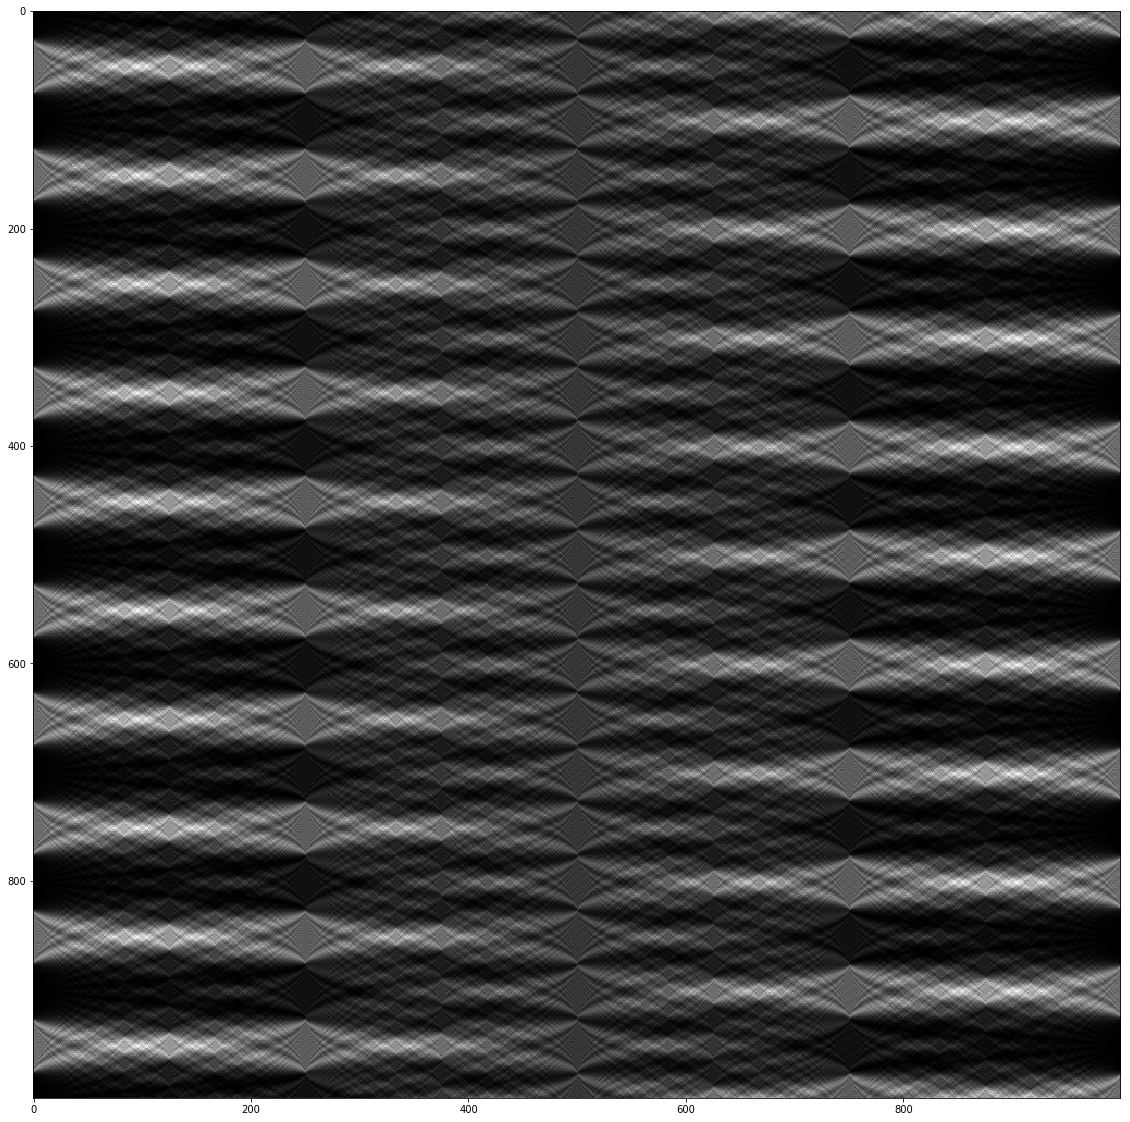

In [45]:
# Beam Propagation Parameters
L = 0.5
M = 5000
lam = 0.5e-6
w = 0.1   #half width
n = 1
p = 1e-2 
z = (20*(p**2))/lam

ui = get_grating_square1D(L,M,lam,w,p)
u2 = display_talbot_carpet(ui,p,lam,L,M)

In [ ]:
# Beam Propagation Parameters
L = 0.5
M = 5000
lam = 0.5e-6
w = 0.1   #half width
n = 1
p = 1e-2 
z = (20*(p**2))/lam

ui = get_grating_square1D(L,M,lam,w,p)
uprop = fresnel_propTF1D(ui,L,lam,z)
Iprop = np.abs(uprop*uprop)
Iin = np.abs(ui*ui)

plt.figure(figsize=(10,10))
plt.plot(Iprop)
plt.plot(Iin);plt.title('Line Profile')
    

In [ ]:
u1 = get_grating_square(L,M,lam,w,p)
z1 = (2*(p**2))/lam
z2 = (3*(p**2))/lam

u2 = fresnel_propTF(u1,L,lam,z1)
u3 = fresnel_propTF(u1,L,lam,z2)
    
#     #Plot the Results  
plt.figure(figsize=(20,20)) 
plt.subplot(331); plt.imshow(np.abs(u1*np.conj(u1)),aspect='equal',cmap='gray'); plt.title('Intensity - Incident Field')
plt.subplot(332); plt.imshow(np.abs(u2*np.conj(u2)),aspect='equal',cmap='gray'); plt.title('Intensity at z1 ')
plt.subplot(333); plt.imshow(np.abs(u3*np.conj(u3)),aspect='equal',cmap='gray'); plt.title('Intensity at z2')
   
plt.subplot(334);plt.plot(np.abs(u1[(M//2 + 1),2000:3000]));plt.title('Line Profile')
plt.subplot(335);plt.plot(np.abs(u2[(M//2 + 1),2000:3000]));plt.title('Line Profile')
plt.subplot(336);plt.plot(np.abs(u3[(M//2 + 1),2000:3000]));plt.title('Line Profile')